In [80]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import MonthLocator, YearLocator, DateFormatter
from matplotlib.ticker import MultipleLocator
from matplotlib.animation import FuncAnimation
import sqlite3
from datetime import datetime
import plotly.graph_objs as go
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
from plotly.subplots import make_subplots

In [81]:
# Connect to the SQLite database
conn = sqlite3.connect('data/sp500_data.db')

In [82]:
# Initialize the Dash app
app = dash.Dash(__name__)

In [83]:
# Ask the user for input
symbol = input("Enter the stock symbol: ")
start_date_str = input("Enter the start date (YYYY-MM-DD): ")
end_date_str = input("Enter the end date (YYYY-MM-DD): ")



In [84]:
# Convert the input strings to datetime objects
start_date = datetime.strptime(start_date_str, '%Y-%m-%d')
end_date = datetime.strptime(end_date_str, '%Y-%m-%d')


In [85]:
# Construct the SQL query
sql_query = f"SELECT * FROM stocks WHERE Symbol = ? AND Date >= ? AND Date <= ?"

In [86]:
# Execute the query with user input
cursor = conn.cursor()
cursor.execute(sql_query, (symbol, start_date_str, end_date_str))
# Fetch all the rows
rowstockdata = cursor.fetchall()


In [87]:
# Create a DataFrame from the query results
columns = [description[0] for description in cursor.description]
df_stockdata = pd.DataFrame(rowstockdata, columns=columns)
df_stockdata

,Date,Symbol,Adj Close,Close,High,Low,Open,Volume,Shortname
0,2020-01-02 00:00:00.000000,AAPL,74.207466,75.087502,75.150002,73.797501,74.059998,135480400.0,Apple Inc.
1,2020-01-03 00:00:00.000000,AAPL,73.486023,74.357498,75.144997,74.125000,74.287498,146322800.0,Apple Inc.
2,2020-01-06 00:00:00.000000,AAPL,74.071579,74.949997,74.989998,73.187500,73.447502,118387200.0,Apple Inc.
3,2020-01-07 00:00:00.000000,AAPL,73.723213,74.597504,75.224998,74.370003,74.959999,108872000.0,Apple Inc.
4,2020-01-08 00:00:00.000000,AAPL,74.909149,75.797501,76.110001,74.290001,74.290001,132079200.0,Apple Inc.
...,...,...,...,...,...,...,...,...,...
98,2020-05-22 00:00:00.000000,AAPL,79.188927,79.722504,79.807503,78.837502,78.942497,81803200.0,Apple Inc.
99,2020-05-26 00:00:00.000000,AAPL,78.652542,79.182503,81.059998,79.125000,80.875000,125522000.0,Apple Inc.
100,2020-05-27 00:00:00.000000,AAPL,78.995224,79.527496,79.677498,78.272499,79.035004,112945200.0,Apple Inc.
101,2020-05-28 00:00:00.000000,AAPL,79.029984,79.562500,80.860001,78.907501,79.192497,133560800.0,Apple Inc.


In [88]:
# Add a percent change column to the DataFrame
df_stockdata['Percent_Change'] = df_stockdata['Adj Close'].pct_change() * 100
# Replace all NaN values in the Percent_Change column with 0
df_stockdata['Percent_Change'].fillna(0, inplace=True)

In [89]:
# Print the DataFrame
df_stockdata

,Date,Symbol,Adj Close,Close,High,Low,Open,Volume,Shortname,Percent_Change
0,2020-01-02 00:00:00.000000,AAPL,74.207466,75.087502,75.150002,73.797501,74.059998,135480400.0,Apple Inc.,0.000000
1,2020-01-03 00:00:00.000000,AAPL,73.486023,74.357498,75.144997,74.125000,74.287498,146322800.0,Apple Inc.,-0.972198
2,2020-01-06 00:00:00.000000,AAPL,74.071579,74.949997,74.989998,73.187500,73.447502,118387200.0,Apple Inc.,0.796826
3,2020-01-07 00:00:00.000000,AAPL,73.723213,74.597504,75.224998,74.370003,74.959999,108872000.0,Apple Inc.,-0.470310
4,2020-01-08 00:00:00.000000,AAPL,74.909149,75.797501,76.110001,74.290001,74.290001,132079200.0,Apple Inc.,1.608633
...,...,...,...,...,...,...,...,...,...,...
98,2020-05-22 00:00:00.000000,AAPL,79.188927,79.722504,79.807503,78.837502,78.942497,81803200.0,Apple Inc.,0.643854
99,2020-05-26 00:00:00.000000,AAPL,78.652542,79.182503,81.059998,79.125000,80.875000,125522000.0,Apple Inc.,-0.677348
100,2020-05-27 00:00:00.000000,AAPL,78.995224,79.527496,79.677498,78.272499,79.035004,112945200.0,Apple Inc.,0.435691
101,2020-05-28 00:00:00.000000,AAPL,79.029984,79.562500,80.860001,78.907501,79.192497,133560800.0,Apple Inc.,0.044002


In [90]:
# Calculate the cumulative percent change for the stock symbol
df_stockdata['Cumulative_Percent_Change'] = ((1 + df_stockdata['Adj Close'].pct_change().fillna(0)).cumprod() * 100)-100
df_stockdata

,Date,Symbol,Adj Close,Close,High,Low,Open,Volume,Shortname,Percent_Change,Cumulative_Percent_Change
0,2020-01-02 00:00:00.000000,AAPL,74.207466,75.087502,75.150002,73.797501,74.059998,135480400.0,Apple Inc.,0.000000,0.000000
1,2020-01-03 00:00:00.000000,AAPL,73.486023,74.357498,75.144997,74.125000,74.287498,146322800.0,Apple Inc.,-0.972198,-0.972198
2,2020-01-06 00:00:00.000000,AAPL,74.071579,74.949997,74.989998,73.187500,73.447502,118387200.0,Apple Inc.,0.796826,-0.183118
3,2020-01-07 00:00:00.000000,AAPL,73.723213,74.597504,75.224998,74.370003,74.959999,108872000.0,Apple Inc.,-0.470310,-0.652566
4,2020-01-08 00:00:00.000000,AAPL,74.909149,75.797501,76.110001,74.290001,74.290001,132079200.0,Apple Inc.,1.608633,0.945569
...,...,...,...,...,...,...,...,...,...,...,...
98,2020-05-22 00:00:00.000000,AAPL,79.188927,79.722504,79.807503,78.837502,78.942497,81803200.0,Apple Inc.,0.643854,6.712883
99,2020-05-26 00:00:00.000000,AAPL,78.652542,79.182503,81.059998,79.125000,80.875000,125522000.0,Apple Inc.,-0.677348,5.990066
100,2020-05-27 00:00:00.000000,AAPL,78.995224,79.527496,79.677498,78.272499,79.035004,112945200.0,Apple Inc.,0.435691,6.451855
101,2020-05-28 00:00:00.000000,AAPL,79.029984,79.562500,80.860001,78.907501,79.192497,133560800.0,Apple Inc.,0.044002,6.498696


In [91]:
# Construct the SQL query for the sp500 table
sql_query_sp500 = f"SELECT * FROM sp500 WHERE Date >= ? AND Date <= ?"

In [92]:
# Execute the query for the sp500 table with user input
cursor_sp500 = conn.cursor()
cursor_sp500.execute(sql_query_sp500, (start_date_str, end_date_str))
# Fetch all the rows from the sp500 table
rows_sp500 = cursor_sp500.fetchall()

In [93]:
# Create a DataFrame from the query results of the sp500 table
columns_sp500 = [description[0] for description in cursor_sp500.description]
df_sp500 = pd.DataFrame(rows_sp500, columns=columns_sp500)

In [94]:
# Add a percent change column to the DataFrame for the sp500 table
df_sp500['Percent_Change'] = df_sp500['SP500_Price'].pct_change() * 100
df_sp500

,Date,SP500_Price,Percent_Change
0,2020-01-02 00:00:00.000000,3257.85,NaN
1,2020-01-03 00:00:00.000000,3234.85,-0.705987
2,2020-01-06 00:00:00.000000,3246.28,0.353339
3,2020-01-07 00:00:00.000000,3237.18,-0.280321
4,2020-01-08 00:00:00.000000,3253.05,0.490242
...,...,...,...
98,2020-05-22 00:00:00.000000,2955.45,0.235373
99,2020-05-26 00:00:00.000000,2991.77,1.228916
100,2020-05-27 00:00:00.000000,3036.13,1.482734
101,2020-05-28 00:00:00.000000,3029.73,-0.210795


In [95]:
# Replace all NaN values in the Percent_Change column with 0 for the sp500 table
df_sp500['Percent_Change'].fillna(0, inplace=True)

In [96]:
df_sp500['Cumulative_Percent_Change'] = ((1 + df_sp500['SP500_Price'].pct_change().fillna(0)).cumprod() * 100)-100
df_sp500

,Date,SP500_Price,Percent_Change,Cumulative_Percent_Change
0,2020-01-02 00:00:00.000000,3257.85,0.000000,0.000000
1,2020-01-03 00:00:00.000000,3234.85,-0.705987,-0.705987
2,2020-01-06 00:00:00.000000,3246.28,0.353339,-0.355142
3,2020-01-07 00:00:00.000000,3237.18,-0.280321,-0.634468
4,2020-01-08 00:00:00.000000,3253.05,0.490242,-0.147336
...,...,...,...,...
98,2020-05-22 00:00:00.000000,2955.45,0.235373,-9.282195
99,2020-05-26 00:00:00.000000,2991.77,1.228916,-8.167350
100,2020-05-27 00:00:00.000000,3036.13,1.482734,-6.805715
101,2020-05-28 00:00:00.000000,3029.73,-0.210795,-7.002164


In [97]:
# conn.close()

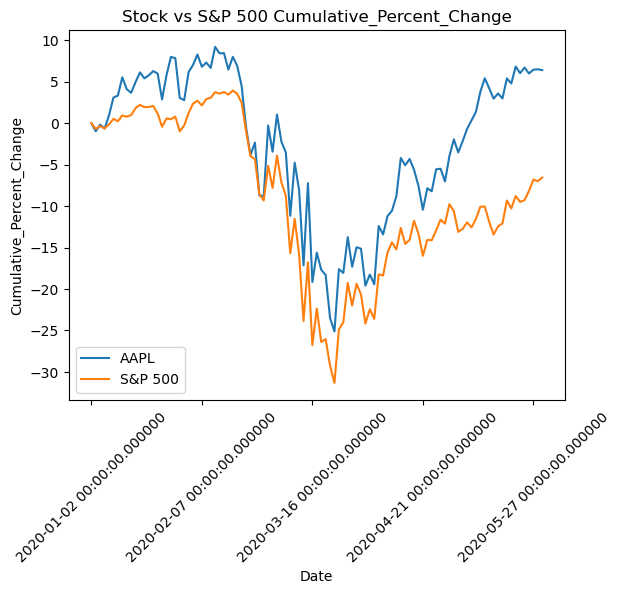

In [98]:
# Create a figure and axis
fig, ax = plt.subplots()

# Plot the percent change data for the input symbol
ax.plot(df_stockdata['Date'], df_stockdata['Cumulative_Percent_Change'], label=symbol)

# Plot the percent change data for the S&P 500
ax.plot(df_sp500['Date'], df_sp500['Cumulative_Percent_Change'], label='S&P 500')

# # Set the x-axis labels to be in the format of "Month Year"
# ax.xaxis.set_major_locator(YearLocator())
# ax.xaxis.set_minor_locator(MonthLocator())
# ax.xaxis.set_major_formatter(DateFormatter('%b %Y'))

# Set the axis labels and title
ax.set_xlabel('Date')
ax.set_ylabel('Cumulative_Percent_Change')
ax.set_title('Stock vs S&P 500 Cumulative_Percent_Change')

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=45)

# Set the x-axis major locator to show every25 days
ax.xaxis.set_major_locator(MultipleLocator(25))

# Display the legend
ax.legend()

# Show the plot
plt.show()

c:\Users\pku11\anaconda3\envs\dev\lib\site-packages\matplotlib\animation.py:884: UserWarning:

Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.



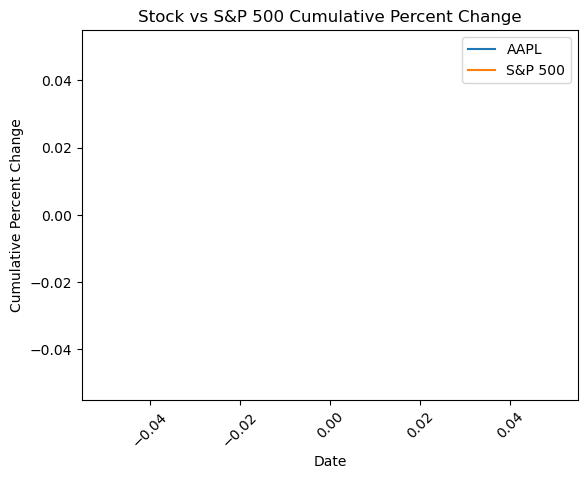

In [99]:
# Create a figure and axis
fig, ax = plt.subplots()

# Initialize the line objects for the plots
line_stock, = ax.plot([], [], label=symbol)
line_sp500, = ax.plot([], [], label='S&P 500')

# Function to update the data in the plots
def update(i):
    start_idx = max(0, i - 5)
    end_idx = i + 1
    x_stock = pd.to_datetime(df_stockdata['Date'].iloc[start_idx:end_idx])
    y_stock = df_stockdata['Cumulative_Percent_Change'].iloc[start_idx:end_idx]
    x_sp500 = pd.to_datetime(df_sp500['Date'].iloc[start_idx:end_idx])
    y_sp500 = df_sp500['Cumulative_Percent_Change'].iloc[start_idx:end_idx]

    line_stock.set_data(x_stock, y_stock)
    line_sp500.set_data(x_sp500, y_sp500)

    return line_stock, line_sp500
# Create the animation
animation = FuncAnimation(fig, update, frames=len(df_stockdata), blit=False)

# # Set the x-axis labels to be in the format of "Month Year"
# ax.xaxis.set_major_locator(YearLocator())
# ax.xaxis.set_minor_locator(MonthLocator())
# ax.xaxis.set_major_formatter(DateFormatter('%b %Y'))
# Set the axis labels and title
ax.set_xlabel('Date')
ax.set_ylabel('Cumulative Percent Change')
ax.set_title('Stock vs S&P 500 Cumulative Percent Change')

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=45)

# # Set the x-axis major locator to show every 5 days
# ax.xaxis.set_major_locator(MultipleLocator(5))

# Display the legend
ax.legend()

# Show the animation
plt.show()



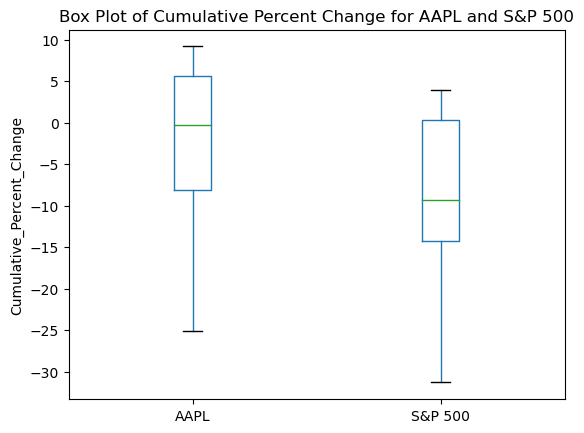

In [100]:
# Combine the percent change data into a single DataFrame
df_combined = pd.concat([df_stockdata['Cumulative_Percent_Change'], df_sp500['Cumulative_Percent_Change']], axis=1)
df_combined.columns = [symbol, 'S&P 500']

# Create a boxplot
df_combined.boxplot(grid=False)
plt.ylabel('Cumulative_Percent_Change')
plt.title(f'Box Plot of Cumulative Percent Change for {symbol} and S&P 500')
plt.show()


In [101]:
# Create a Plotly figure
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add traces for the stock and SP500
fig.add_trace(
    go.Scatter(x=df_stockdata['Date'], y=df_stockdata['Cumulative_Percent_Change'], name=f"{symbol} Cumulative Percent Change", mode='lines'),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter(x=df_sp500['Date'], y=df_sp500['Cumulative_Percent_Change'], name="S&P 500 Cumulative Percent Change", mode='lines'),
    secondary_y=True,
)


In [102]:
# Create a Plotly figure
fig = make_subplots(specs=[[{"secondary_y": True}]])


In [103]:
# Add dropdown list for changing time frame
fig.update_layout(
    updatemenus=[
        dict(
            buttons=list([
                dict(label="1 Month", method="update", args=[{"visible": [True, True]}, {"title": f'{symbol} Cumulative Percent Change compared to S&P 500 from {start_date_str} to {end_date_str}', "xaxis_title": "Date", "yaxis_title": f'{symbol} Cumulative Percent Change', "yaxis2_title": "S&P 500 Cumulative Percent Change"}]),
                dict(label="6 Months", method="update", args=[{"visible": [True, True]}, {"title": f'{symbol} Cumulative Percent Change compared to S&P 500 from {start_date_str} to {end_date_str}', "xaxis_title": "Date", "yaxis_title": f'{symbol} Cumulative Percent Change', "yaxis2_title": "S&P 500 Cumulative Percent Change"}]),
                dict(label="1 Year", method="update", args=[{"visible": [True, True]}, {"title": f'{symbol} Cumulative Percent Change compared to S&P 500 from {start_date_str} to {end_date_str}', "xaxis_title": "Date", "yaxis_title": f'{symbol} Cumulative Percent Change', "yaxis2_title": "S&P 500 Cumulative Percent Change"}]),
                dict(label="3 Years", method="update", args=[{"visible": [True, True]}, {"title": f'{symbol} Cumulative Percent Change compared to S&P 500 from {start_date_str} to {end_date_str}', "xaxis_title": "Date", "yaxis_title": f'{symbol} Cumulative Percent Change', "yaxis2_title": "S&P 500 Cumulative Percent Change"}]),
                dict(label="5 Years", method="update", args=[{"visible": [True, True]}, {"title": f'{symbol} Cumulative Percent Change compared to S&P 500 from {start_date_str} to {end_date_str}', "xaxis_title": "Date", "yaxis_title": f'{symbol} Cumulative Percent Change', "yaxis2_title": "S&P 500 Cumulative Percent Change"}]),
            ]),
            direction="down",
            showactive=True,
            x=0.1,
            xanchor="left",
            y=1.1,
            yanchor="top"
        ),
    ]
)


In [104]:
# Add input box for updating stock symbol
fig.update_layout(
    annotations=[
        dict(
            text="Enter Stock Symbol:",
            x=0,
            xref="paper",
            y=1.05,
            yref="paper",
            align="left",
            showarrow=False
        ),
    ]
)

app.layout = html.Div([
    dcc.Graph(id='plot', figure=fig),
    dcc.Input(id='stock-symbol', value=symbol, type='text', debounce=True),
])

@app.callback(
    Output('plot', 'figure'),
    [Input('stock-symbol', 'value')]
    )

SyntaxError: incomplete input (3401536709.py, line 24)